<a href="https://colab.research.google.com/github/kairamilanifitria/Bootcamp-NLP/blob/main/Project%201%20Sentiment%20Analysis/1_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/tweet.csv') # raw dataset
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦"


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


In [4]:
df.describe()

,sentimen,tweet
count,1815,1815
unique,3,1815
top,positif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
freq,612,1


In [5]:
df.isnull().sum()

,0
sentimen,0
tweet,0


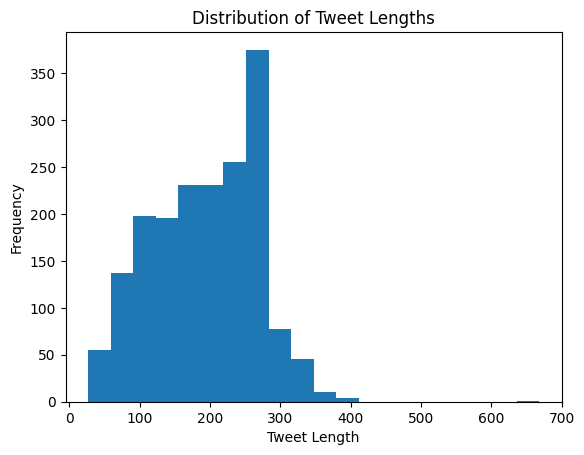

In [6]:
df['tweet_length'] = df['tweet'].apply(len)
plt.hist(df['tweet_length'], bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64


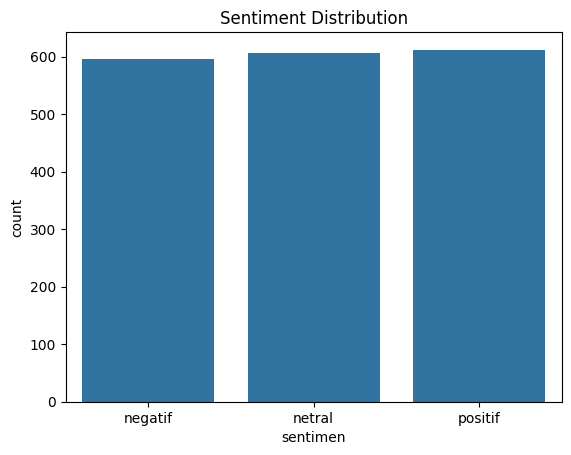

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df['sentimen'].value_counts()
print(sentiment_counts)

sns.countplot(x='sentimen', data=df)
plt.title('Sentiment Distribution')
plt.show()

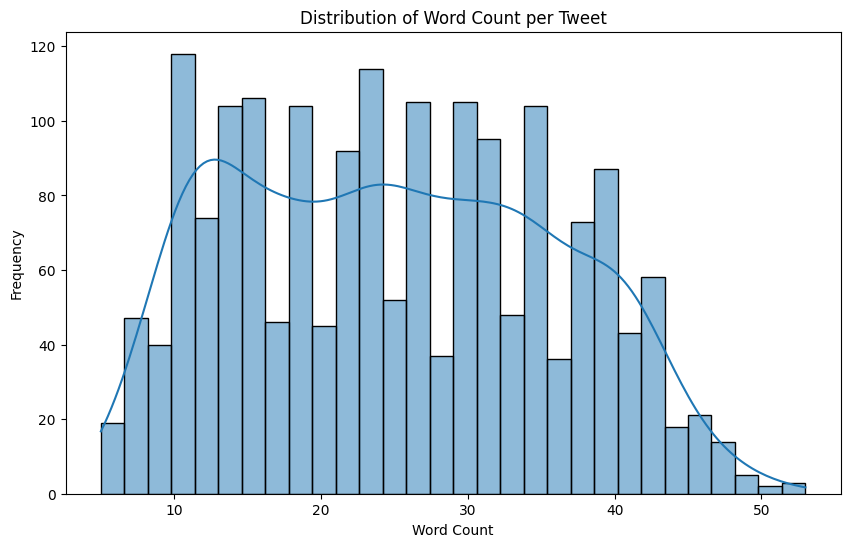

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate word count for each tweet and store it in a new column 'word_count'
df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count per Tweet')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

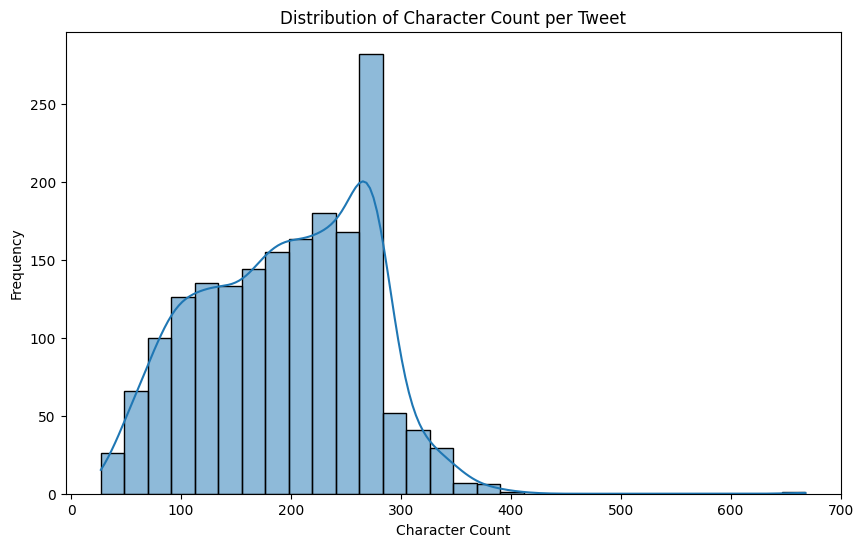

In [9]:
df['char_count'] = df['tweet'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(df['char_count'], bins=30, kde=True)
plt.title('Distribution of Character Count per Tweet')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None, ngram_range=(1,1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_unigrams = get_top_ngrams(df['tweet'], n=20)
top_unigrams


[('jokowi', 1022),
 ('ekonomi', 1013),
 ('prabowo', 975),
 ('dan', 774),
 ('yg', 666),
 ('di', 552),
 ('gaji', 493),
 ('pak', 483),
 ('sandi', 436),
 ('com', 428),
 ('presiden', 415),
 ('ðÿ', 406),
 ('itu', 386),
 ('https', 370),
 ('ini', 341),
 ('indonesia', 332),
 ('yang', 327),
 ('akan', 323),
 ('harga', 307),
 ('tidak', 281)]

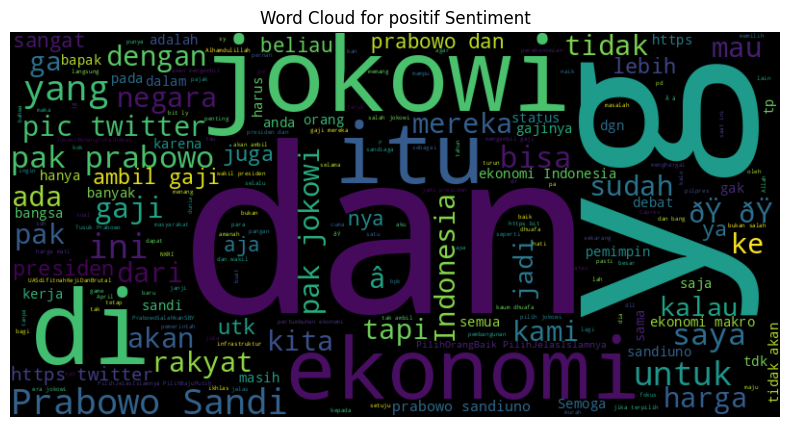

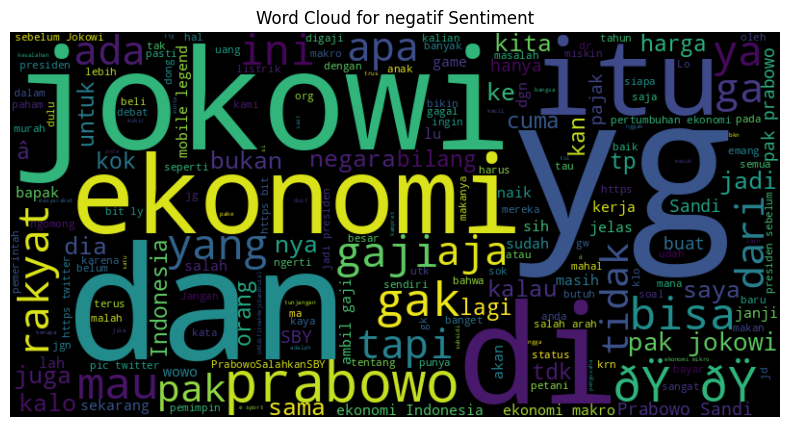

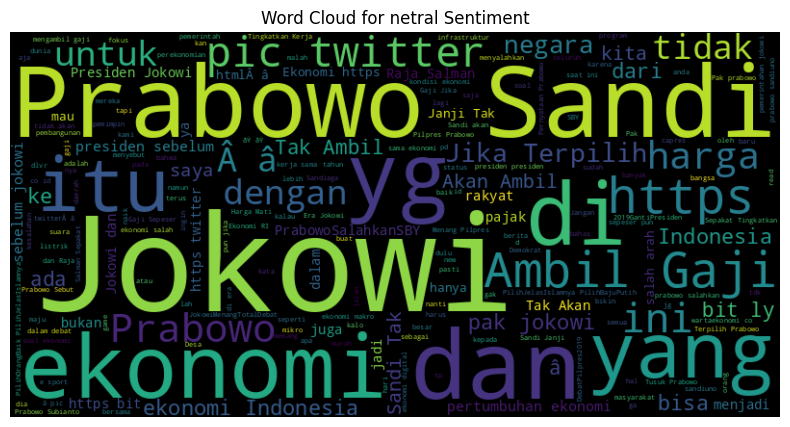

In [11]:
from wordcloud import WordCloud

def generate_wordcloud(data, sentiment):
    subset = data[df['sentimen'] == sentiment]
    text = ' '.join(subset['tweet'].values)
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

generate_wordcloud(df, 'positif')
generate_wordcloud(df, 'negatif')
generate_wordcloud(df, 'netral')


In [12]:
df['hashtags'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.startswith('#')]))
df['hashtags']

,hashtags
0,
1,
2,#01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat
3,
4,
...,...
1810,#2019GantiPresiden
1811,#PutihkanGBK
1812,
1813,


In [13]:
from collections import Counter

hashtag_counts = Counter()
for hashtags in df['hashtags']:
  for hashtag in hashtags.split():
    if hashtag:
      hashtag_counts[hashtag] += 1

most_common_hashtags = hashtag_counts.most_common(30)  # Get top 10 most used hashtags

print("Most used hashtags:")
for hashtag, count in most_common_hashtags:
  print(f"{hashtag}: {count}")


Most used hashtags:
#PrabowoSalahkanSBY: 88
#PilihOrangBaik: 60
#PilihBajuPutih: 60
#PilihJelasIslamnya: 54
#JokowiMenangTotalDebat: 53
#UASdifitnahKejiDanBrutal: 34
#DebatPilpres2019: 22
#TusukPrabowoSandi: 21
#2019GantiPresiden: 19
#bukansalahbapak: 17
#YourTurnBro: 16
#HoaxJkwMenangTotalDebat: 14
#BeraniPilih02: 13
#TerimaKasihIstriku: 11
#UASdifitnahKejiBalasDiTPS: 10
#2019JokowiKyaiMaruf: 10
#01IndonesiaMaju: 9
#DebatTerakhirPilpres2019: 7
#PilihYgJelasIslamnya: 6
#PilihYgBajuPutih: 6
#PilihOrangBaikÂ: 6
#PilihJelasIslamnyaÂ: 6
#01ndonesiaMaju: 6
#17AprilCoblosBajuPutih: 6
#PrabowoSandi: 5
#2019TetapJokowi: 5
#JokowiLagi: 4
#17AprilPilihPrabowoSandi: 4
#JatimMantapPilihPrabowo: 4
#PancasilaHargaMati: 4


In [14]:
df['mentions'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.startswith('@')]))
df['mentions']

,mentions
0,@prabowo @rockygerung?ðŸ˜œ
1,
2,
3,
4,
...,...
1810,
1811,
1812,
1813,


In [15]:
mention_counts = Counter()
for mentions in df['mentions']:
  for mention in mentions.split():
    if mention:
      mention_counts[mention] += 1

most_common_mentions = mention_counts.most_common(30)  # Get top 10 most used mentions

print("Most mentioned accounts:")
for mention, count in most_common_mentions:
  print(f"{mention}: {count}")


Most mentioned accounts:
@jokowi: 201
@prabowo: 141
@sandiuno: 100
@jokowi.: 19
@Jokowi: 17
@KHMarufAmin_: 12
@SBYudhoyono: 10
@jokowi,: 8
@bocahsosmed: 8
@saaebunglon: 8
@KPU_ID: 7
@sukangetweet: 7
@Prabowo: 6
@AgusYudhoyono: 5
@MardaniAliSera: 4
@Fahrihamzah: 4
@Dennysiregar7: 4
@sandiuno,: 4
@metrobali: 3
@fadlizon: 3
@KPU_RI: 3
@AlvinoLulu: 3
@SandiUno: 3
@FadliZon: 3
@bawaslu_RI: 3
@RamliRizal: 3
@DivHumas_Polri: 2
@YouTube: 2
@VidiaAmanda3: 2
@Bali: 2


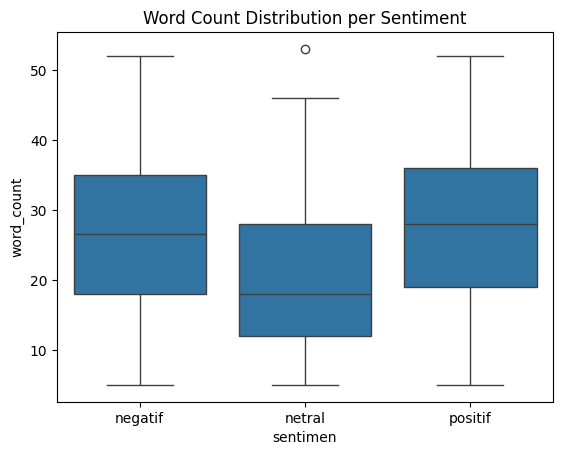

In [16]:
sns.boxplot(x='sentimen', y='word_count', data=df)
plt.title('Word Count Distribution per Sentiment')
plt.show()

In [17]:
# Calculate the IQR for each sentiment group
def find_outliers_iqr(df, column, sentiment):
    Q1 = df[df['sentimen'] == sentiment][column].quantile(0.25)
    Q3 = df[df['sentimen'] == sentiment][column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['sentimen'] == sentiment) & ((df[column] < lower_bound) | (df[column] > upper_bound))]
    return outliers


# Find outliers for each sentiment group based on 'word_count'
outliers_positif = find_outliers_iqr(df, 'word_count', 'positif')
outliers_negatif = find_outliers_iqr(df, 'word_count', 'negatif')
outliers_netral = find_outliers_iqr(df, 'word_count', 'netral')

# Print the outliers for each sentiment group
print("Outliers in 'positif' sentiment:")
print(outliers_positif)

print("\nOutliers in 'negatif' sentiment:")
print(outliers_negatif)

print("\nOutliers in 'netral' sentiment:")
print(outliers_netral)


Outliers in 'positif' sentiment:
Empty DataFrame
Columns: [sentimen, tweet, tweet_length, word_count, char_count, hashtags, mentions]
Index: []

Outliers in 'negatif' sentiment:
Empty DataFrame
Columns: [sentimen, tweet, tweet_length, word_count, char_count, hashtags, mentions]
Index: []

Outliers in 'netral' sentiment:
    sentimen  \
243   netral   

                                                                                                                                                                                                                                                                                      tweet  \
243  Tnya sj pd diri anda jg apa msh sehat jg g anda? Semua harga ga cuma gas lpg aja yg sudah ada H.E.T Kalau anda mau harga 15-16rb.beli di pangkalan atau agen atau di SPBU yg menyediakan LPG Bnyk yg antri mlh. Desa baik" aja mas,makane kl anda pgn duitnya bnyk,kerja keras masðŸ˜‚   

     tweet_length  word_count  char_count hashtags mentions  
243     

In [20]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 9.0 MB/s eta 0:00:00


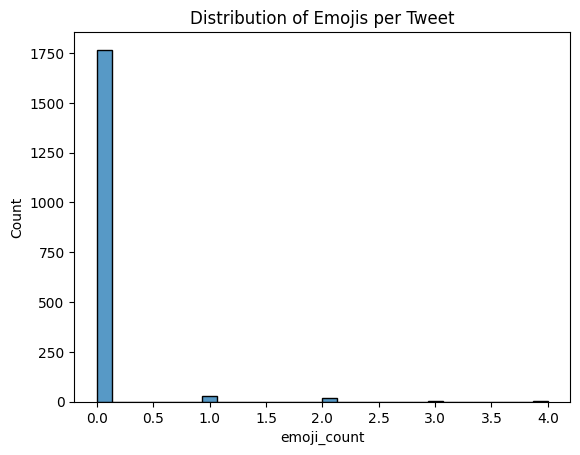

In [23]:
import emoji
# Replace emoji.UNICODE_EMOJI with emoji.EMOJI_DATA
df['emoji_count'] = df['tweet'].apply(lambda x: sum([1 for char in x if char in emoji.EMOJI_DATA]))
sns.histplot(df['emoji_count'], bins=30)
plt.title('Distribution of Emojis per Tweet')
plt.show()

In [24]:
# find the most used emoji based on the dataset

from collections import defaultdict

emoji_counts = defaultdict(int)
for tweet in df['tweet']:
  for char in tweet:
    if char in emoji.EMOJI_DATA:
      emoji_counts[char] += 1

most_used_emoji = sorted(emoji_counts.items(), key=lambda item: item[1], reverse=True)

print("Most used emojis:")
for emoji, count in most_used_emoji[:10]:  # Print top 10 most used emojis
  print(f"{emoji}: {count}")


Most used emojis:
™: 50
©: 15
®: 4


In [25]:
# find the words that is not knowing the meaning in indonesia language based on the dataset

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('indonesian'))

unknown_words = set()

for tweet in df['tweet']:
  words = word_tokenize(tweet)
  for word in words:
    if word.isalpha() and word.lower() not in stop_words and not word.lower().isascii():
      unknown_words.add(word.lower())

print("Possible unknown words in Indonesian:")
print(unknown_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Possible unknown words in Indonesian:
{'soalâ', 'akuisisiâ', 'â', 'untukâ', 'pilihorangbaikâ', 'âˆš', 'ðÿ', 'nyataðÿ', 'pilihjelasislamnyaâ', 'sandiðÿ', 'diamanatkanâ', 'ä', 'masaâ', 'jokowâ', 'sebelumâ', 'âœœâœœ', 'ambilâ', 'lã', 'kufurâ', 'presidenâ', 'digitalâ', 'maniaðÿ', 'š', 'ªðÿ', 'pilpresâ', 'deindustrialidsasiâ', 'pembangunanâ'}


In [26]:
# find the slang words based on dataset

from collections import defaultdict

def find_slang_words(df):
  """
  Identifies potential slang words in the dataset.

  Args:
    df: Pandas DataFrame containing the tweet data.

  Returns:
    A dictionary where keys are potential slang words and values are their counts.
  """

  word_counts = defaultdict(int)
  for tweet in df['tweet']:
    words = word_tokenize(tweet)
    for word in words:
      if not word.isalpha() or word.lower() in stop_words or word.lower().isascii():
          continue
      word_counts[word.lower()] += 1

  potential_slang = {word: count for word, count in word_counts.items() if count >= 1} # You can adjust the threshold
  return potential_slang


slang_words = find_slang_words(df)

print("Potential Slang Words:")
for word, count in slang_words.items():
  print(f"{word}: {count}")


Potential Slang Words:
ðÿ: 32
pilihorangbaikâ: 6
pilihjelasislamnyaâ: 6
â: 6
âˆš: 1
lã: 1
diamanatkanâ: 1
ä: 1
nyataðÿ: 1
digitalâ: 1
soalâ: 1
maniaðÿ: 1
masaâ: 2
kufurâ: 1
akuisisiâ: 1
pembangunanâ: 1
deindustrialidsasiâ: 1
pilpresâ: 1
sebelumâ: 1
jokowâ: 2
untukâ: 1
ambilâ: 2
presidenâ: 1
sandiðÿ: 1
š: 1
ªðÿ: 1
âœœâœœ: 1


In [27]:
# find the unrelated number in the column tweet based on the dataset, also show the data itself

import re

def find_unrelated_numbers(df):
  """
  Finds numbers in the 'tweet' column that are likely unrelated to the sentiment analysis.

  Args:
    df: Pandas DataFrame containing the tweet data.

  Returns:
    A list of tuples, where each tuple contains:
      - The tweet text.
      - The list of unrelated numbers found in the tweet.
  """
  unrelated_numbers = []
  for index, row in df.iterrows():
    tweet = row['tweet']
    numbers = re.findall(r'\b\d+\b', tweet)
    if numbers:
      unrelated_numbers.append((tweet, numbers))
  return unrelated_numbers


unrelated_numbers = find_unrelated_numbers(df)
print("Tweets with unrelated numbers:")
for tweet, numbers in unrelated_numbers:
  print(f"Tweet: {tweet}")
  print(f"Unrelated numbers: {numbers}")
  print("-" * 20)



Tweets with unrelated numbers:
Tweet: Kata @prabowo Indonesia tidak dihargai bangsa asing!   Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦
Unrelated numbers: ['1117575436337160192']
--------------------
Tweet: Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!
Unrelated numbers: ['18', '5']
--------------------
Tweet: Prabowo-Sandi Sepakat Tak Ambil Gaji karena Negara Sedang Susah  https://www.goaceh.co/artikel/serbaserbi/2019/04/14/prabowosandi-sepakat-tak-ambil-gaji-karena-negara-sedang-susah/?utm_source=dlvr.it&utm_medium=twitterÂ â€¦ .. ... #GoAceh
Unrelated numbers: ['2019', '04', '14']
--------------------
Tweet: #PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih Pilih pemimpin itu yg udh jelas banyak pencapaiannya. Nah, ini dia 5 pencapaian ekonomi selama pemerintahan Jokowi. Coblos 01 Yuk Kerja Pasti !   ht

# Data Cleaning

In [28]:
import re

def clean_text(text):
    # Remove URL + lowercase
    text = re.sub(r'#(\w+)', lambda match: ' ' + re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', match.group(1)), text)
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'pic\.twitter\.com/\S+', '', text)

    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning function to the 'tweet' column
df['tweet'] = df['tweet'].apply(clean_text)


In [29]:
df[['sentimen', 'tweet']]

,sentimen,tweet
0,negatif,kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung
1,netral,batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy
2,netral,di era jokowi ekonomi indonesia semakin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negatif,negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak
...,...,...
1810,netral,negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat 2019 ganti presiden
1811,netral,1 hrs ceramah di damai indonesiaku 2 perekonomian makin membaik putihkan gbk
1812,netral,mari bangun bangsa dgn mendukung perekonomian negara bersama pak jokowi ayo kerja
1813,netral,bantu majukan perekonomian bangsa bersama pak jokowi yuk


# Data Preparation : Apply slang words

In [24]:
#!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [30]:
from datasets import load_dataset

# Load the Indonesian slang dataset from Hugging Face
dataset = load_dataset("theonlydo/indonesia-slang")
slang_dict = {entry['slang']: entry['formal'] for entry in dataset['train']}

# Example slang dictionary (for reference)
print(slang_dict)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


slang-indo.csv:   0%|          | 0.00/65.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4412 [00:00<?, ? examples/s]

{'woww': 'wow', 'aminn': 'amin', 'met': 'selamat', 'netaas': 'menetas', 'keberpa': 'keberapa', 'eeeehhhh': 'eh', 'kata2nyaaa': 'kata-katanya', 'hallo': 'halo', 'kaka': 'kakak', 'ka': 'kak', 'daah': 'dah', 'aaaaahhhh': 'ah', 'yaa': 'ya', 'smga': 'semoga', 'slalu': 'selalu', 'amiin': 'amin', 'kk': 'kakak', 'trus': 'terus', 'sii': 'sih', 'nyenengin': 'menyenangkan', 'bgt': 'banget', 'gemess': 'gemas', 'akuuu': 'aku', 'jgn': 'jangan', 'udah': 'sudah', 'gitu': 'begitu', 'aja': 'saja', 'gemesiin': 'menggemaskan', 'menyenangkn': 'menyenangkan', 'rb': 'ribu', 'akau': 'aku', 'saranin': 'menyarankan', 'nemuin': 'menemukan', 'yah': 'ya', 'mnis2nya': 'manis-manisnya', 'gtu': 'begitu', 'tu': 'itu', 'idolaa': 'idola', 'bangett': 'banget', 'kaakk': 'kak', 'baaiikkk': 'baik', 'telaatt': 'telat', 'kaak': 'kak', 'yg': 'yang', 'lg': 'lagi', 'skarang': 'sekarang', 'sempet': 'sempat', 'karna': 'karena', 'ngga': 'enggak', 'mantep': 'mantap', 'loohhh': 'loh', 'yeee': 'ya', 'baguuuuus': 'bagus', 'sampe': 'sam

In [31]:
def replace_slang(tweet):
    return ' '.join([slang_dict.get(word, word) for word in tweet.split()])

# Apply the function to your dataset
df['tweet_clean'] = df['tweet'].apply(replace_slang)

# Print out the cleaned tweets
df[['tweet', 'tweet_clean']]

,tweet,tweet_clean
0,kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung,kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung
1,batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy,batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy
2,di era jokowi ekonomi indonesia semakin baik 01 indonesia maju jokowi lagi jokowi menang total debat,di era jokowi ekonomi indonesia semakin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat,bagi sumatera selatan asian games berdampak pada ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak,negara kita ngutang buat bangun infrastruktur yang sudah dipakai masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapat penghasilan penghasilan negara itu ya dari pajak
...,...,...
1810,negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat 2019 ganti presiden,negarawan sejati selalu bangga dan mengedepankan harga diri bangsanya yang berdaulat 2019 ganti presiden
1811,1 hrs ceramah di damai indonesiaku 2 perekonomian makin membaik putihkan gbk,1 harus ceramah di damai indonesiaku 2 perekonomian makin membaik putihkan gbk
1812,mari bangun bangsa dgn mendukung perekonomian negara bersama pak jokowi ayo kerja,mari bangun bangsa dengan mendukung perekonomian negara bersama pak jokowi ayo kerja
1813,bantu majukan perekonomian bangsa bersama pak jokowi yuk,bantu majukan perekonomian bangsa bersama pak jokowi yuk


In [32]:
# make a dataset in csv that i can download that only consist of column sentimen and tweet_clean

df_new = df[['sentimen', 'tweet_clean']]
df_new.to_csv('sentiment_tweet.csv', encoding = 'utf-8-sig', index=False)
from google.colab import files
files.download('sentiment_tweet.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## STOP WORDS (Optional)

In [33]:
from nltk.corpus import stopwords
import nltk

# Download the stopwords list if not already downloaded
nltk.download('stopwords')

# Get Indonesian stopwords
stop_words = set(stopwords.words('indonesian')) # Use words instead of get

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Apply stopwords removal function to the 'tweet' column
df['tweet_clean2'] = df['tweet_clean'].apply(remove_stopwords)


In [38]:
df[['sentimen','tweet_clean', 'tweet_clean2']]

,sentimen,tweet_clean,tweet_clean2
0,negatif,kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung,prabowo indonesia dihargai bangsa asing berita hoax buatan penguasa ya rockygerung
1,netral,batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy,batuan langka tasbih jokowi hadiah habib luthfi seharga mercy
2,netral,di era jokowi ekonomi indonesia semakin baik 01 indonesia maju jokowi lagi jokowi menang total debat,era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,bagi sumatera selatan asian games berdampak pada ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat,sumatera selatan asian games berdampak ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negatif,negara kita ngutang buat bangun infrastruktur yang sudah dipakai masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapat penghasilan penghasilan negara itu ya dari pajak,negara ngutang bangun infrastruktur dipakai masyarakat masyarakatnya ngeluh negara ngutang negara ngutang utang dibayar kalo negara penghasilan penghasilan negara ya pajak
...,...,...,...
1810,netral,negarawan sejati selalu bangga dan mengedepankan harga diri bangsanya yang berdaulat 2019 ganti presiden,negarawan sejati bangga mengedepankan harga bangsanya berdaulat 2019 ganti presiden
1811,netral,1 harus ceramah di damai indonesiaku 2 perekonomian makin membaik putihkan gbk,1 ceramah damai indonesiaku 2 perekonomian membaik putihkan gbk
1812,netral,mari bangun bangsa dengan mendukung perekonomian negara bersama pak jokowi ayo kerja,mari bangun bangsa mendukung perekonomian negara jokowi ayo kerja
1813,netral,bantu majukan perekonomian bangsa bersama pak jokowi yuk,bantu majukan perekonomian bangsa jokowi yuk


In [35]:
# make a dataset in csv that i can download that only consist of column sentimen and tweet_clean

df_new = df[['sentimen', 'tweet_clean2']]
df_new.to_csv('sentiment_tweet(stopwords).csv', encoding = 'utf-8-sig', index=False)
from google.colab import files
files.download('sentiment_tweet(stopwords).csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>